In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data)
df.columns=housing.feature_names
df['price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
y = df['price']
x = df.drop(['Latitude', 'Longitude', 'price'], axis =1)

In [5]:
sscaler = StandardScaler()
sscaler.fit(x)
X_std= sscaler.transform(x)

## 1. Define input output and model

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(14448, 6)

In [7]:
class Linearregression(nn.Module):
    def __init__(self, X_train):
        super(Linearregression, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8,4)
        self.layer4 = nn.Linear(4,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        return x
    
model = Linearregression(X_train)
print(model)
    

Linearregression(
  (layer1): Linear(in_features=6, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=4, bias=True)
  (layer4): Linear(in_features=4, out_features=1, bias=True)
)


In [8]:
x = torch.tensor(np.array(X_train), dtype = torch.float32, requires_grad=True)
y = torch.tensor(np.array(y_train).reshape(-1,1), dtype = torch.float32 )

## 2. Define Loss and optimizer

In [9]:
epochs = 1000
learning_rate = 0.001
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## 3. Model training

In [10]:
loss_list =[]
for epoch in range(epochs):

    #Initializing the model parameter
    optimizer.zero_grad(set_to_none=True)

    #Forward pass and model training
    y_predict = model(x)

    #Prediting loss
    mse_loss = loss(y_predict, y)
    loss_list.append(mse_loss.item())

    #Backward propagating the loss
    mse_loss.backward()

    #update the parameters
    optimizer.step()

    if (epoch%100==0):
        print(f'Epoch : {epoch}, loss : {mse_loss.item()}')


Epoch : 0, loss : 6.040915489196777
Epoch : 100, loss : 3.8336501121520996
Epoch : 200, loss : 2.3462131023406982
Epoch : 300, loss : 1.6274685859680176
Epoch : 400, loss : 1.393518328666687
Epoch : 500, loss : 1.315229058265686
Epoch : 600, loss : 1.264589786529541
Epoch : 700, loss : 1.214797019958496
Epoch : 800, loss : 1.1609934568405151
Epoch : 900, loss : 1.100805401802063


## Predictions and Validations

In [11]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [12]:
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.23059011910389748
0.23458109748180156


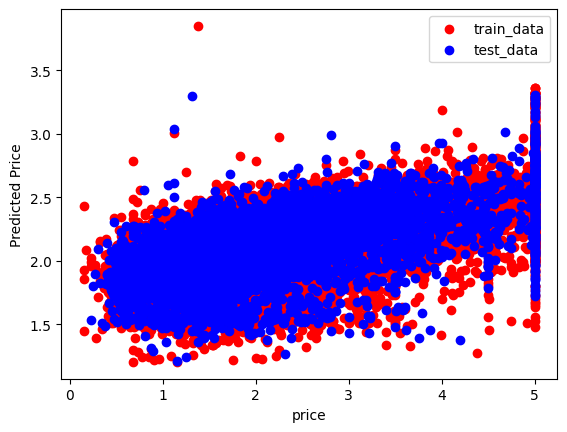

In [13]:
plt.xlabel("price")
plt.ylabel("Predicted Price")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

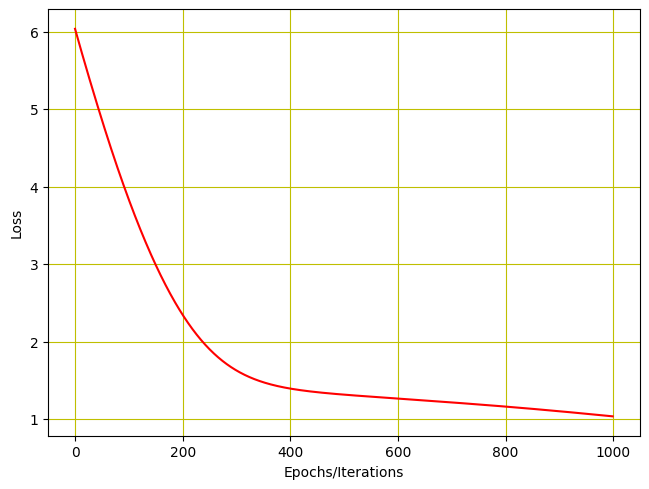

In [14]:
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()